In [1]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import *
from qiskit.visualization import plot_histogram
%matplotlib inline

# Inner Product

For the Quantum SVM, I will need to be able to take an inner product of two vectors.  Thus, I will write a circuit for doing so below.

In [4]:
# Theta and phi are used to construct 
def innerProductCirc(theta, phi):
    circ = QuantumCircuit(2, 1)
    
    circ.h(0)
    circ.ry(theta, 1)
    circ.cry(phi-theta, 0, 1)
    circ.h(0)
    circ.measure([0], [0])
    return circ

def runInnerProduct(theta, phi, shots=2048):
    circ = innerProductCirc(theta, phi)
    backend = Aer.get_backend("qasm_simulator")
    job = execute(circ, backend, shots=shots)
    res = job.result()
    counts = res.get_counts()
    if '0' not in counts:
        counts['0'] = 0
    if '1' not in counts:
        counts['1'] = 0
    return counts['0']/shots - counts['1']/shots

In [13]:
theta = np.pi/3
phi   = 5*np.pi/12

#Verification
alpha = np.array([np.cos(theta/2), np.sin(theta/2)])
beta = np.array([np.cos(phi/2), np.sin(phi/2)])

print(alpha @ beta)

0.9914448613738105


In [14]:
# Running the circuit
print(runInnerProduct(theta, phi, shots=2048*16))

0.99267578125


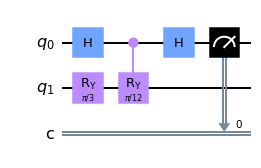

In [15]:
# Show circuit
circ = innerProductCirc(theta, phi)
circ.draw("mpl")